In [1]:
import os
import networkx as nx
import json 
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
filelist = os.listdir("jobjsonfiles")
len(filelist)
type(filelist)

list

In [3]:
small_set = filelist[0:100]
small_set = filelist

In [4]:
# make each filename the key to the dict of the json of the file
jobs = {}
corrupted = []

for filename in small_set:    
    try:
        with open('jobjsonfiles/'+filename) as file:        
            jobs[filename] = json.load(file)
    except:
        corrupted.append(filename)
        

In [5]:
meta =  jobs[small_set[0] ]['meta'][0]
print(  meta['sector'] , ' - ', meta['job_class'], ' - ',meta['job_category'], ' - ',meta['salary'] )

Structural Engineering  -  Designer  -  Engineering  -  60000


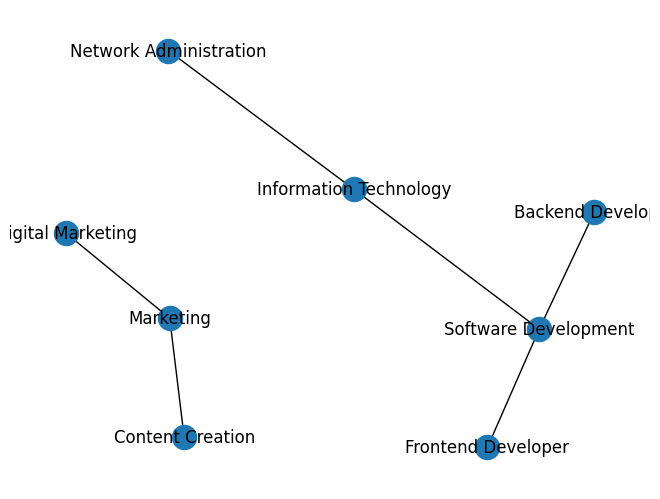

In [6]:
import re

prefix_pattern = '^[0-9]*-'


jobgroups = {}
# eg
#  { 'Software Engineering' : [ 'backend': [ job1 , job 2, ]  ]}

for filename in small_set:
    try:
        
        
        
        meta =  jobs[filename]['meta'][0]
        #print(  meta['sector'] , ' - ', meta['job_class'], ' - ',meta['job_category'], ' - ',meta['salary'] )
        job_title = re.sub(prefix_pattern, '',filename ).replace('.json','').replace('-',' ')
        #print(job_title)
        
        #if(job_title != 'Registered Nurse'):
        #    continue
        # we check if the sector has started being captured
        if(meta['sector'] in jobgroups.keys() ):
            #check if this class of job is in the data structure
            #print('add job to ',meta['sector']) 
            
            if(  job_title in jobgroups[meta['sector']].keys()  ):
                
                #print('add job')
                (jobgroups[meta['sector']][ job_title]).append(filename) 
            else:
                jobgroups[meta['sector']][ job_title] = []
                (jobgroups[meta['sector']][ job_title]).append('jobjson1') 
        else:
            jobgroups[meta['sector']] = {}
            #print(jobgroups[meta['sector']])
            #jobgroups[meta['sector']].append( { meta['job_class'] : job_title } )
            #jobgroups[meta['sector']].append(  meta['job_class'] )
        
    except:
        
        corrupted.append(filename)

print(json.dumps(jobgroups, indent=4))
        

{
    "Structural Engineering": {
        "Structural Engineer   Special Inspector": [
            "jobjson1"
        ]
    },
    "Healthcare": {
        "Critical Care Physician Assistant": [
            "jobjson1"
        ],
        "Mental Health Professional": [
            "jobjson1",
            "2148434726-Mental-Health-Professional.json",
            "3697362066-Mental-Health-Professional.json",
            "3699426763-Mental-Health-Professional.json",
            "3699428433-Mental-Health-Professional.json"
        ],
        "Clinic Managers": [
            "jobjson1"
        ],
        "Health Compliance Health Information Representative II": [
            "jobjson1"
        ],
        "Clinical Dietitian": [
            "jobjson1",
            "3693046479-Clinical-Dietitian.json"
        ],
        "Audiologist Hearing Aid Specialist": [
            "jobjson1"
        ],
        "Medical Billing Manager": [
            "jobjson1"
        ],
        "Psychiatrist": [
      

In [68]:
jobgroups.keys()
print(len(jobgroups))
for key in jobgroups.keys():
    jobscount = len(jobgroups[key])
    print(f'{jobscount} - {key} ')
    #print(jobgroups[key])

1088
1 - Structural Engineering 
1 - Healthcare 
1 - Skilled Trades 
1 - Marketing 
1 - Financial Services 
1 - Property Management 
1 - Media 
1 - Administration 
1 - Sales 
1 - Construction 
1 - Accounting 
1 - Workforce Solutions 
1 - Environmental Services 
1 - Software Engineering 
1 - Energy 
1 - Logistics 
1 - Technology 
1 - Management 
1 - Therapy 
1 - Fashion 
1 - Health and Wellness 
1 - Law 
1 - Legal 
1 - Nonprofit 
1 - Finance 
1 - Education 
1 - Manufacturing 
1 - Service 
1 - Security 
1 - Maintenance 
1 - Financial 
1 - Project Management 
1 - Digital Design 
1 - Sales & Marketing 
1 - Design 
1 - Government 
1 - Insurance 
1 - Environmental Health and Safety 
1 - Graphic Design 
1 - Customer Service 
1 - New Business Development 
1 - Veterinary 
1 - Youth Development 
1 - Cloud Computing 
1 - Renewable Energy 
1 - Industrial 
1 - Cargo 
1 - Infrastructure 
1 - Turnaround & Restructuring 
1 - Customer Relations 
1 - Real Estate 
1 - Agriculture 
1 - Research and Develo

In [9]:
for filename in corrupted:
    if os.path.exists('jobjsonfiles/'+filename):
        os.remove('jobjsonfiles/'+filename)
        print('deleted ' + filename)
    

deleted 3693071638-Engineer
deleted 3694103020-Process-Operations
deleted 3699402320-Sales-Executive-Channel
deleted 3699410536-Electrical-Engineering-Intern.json
deleted 3701314502-Systems-Engineer
deleted 3701319180-Team-Leader,-WFMOA
deleted 3701366278-Event-Staff
deleted 3693043743-Full-Stack-Developer.json
deleted 3693044246-Registrar-and-Business-Manager.json
deleted 3693045468-Quality-Technician.json
deleted 3693047172-Healthcare-Office-Leader.json
deleted 3693047344-Low-Code-Developer.json
deleted 3693054269-Software-Developer.json
deleted 3693055429-Sybase-DBA.json
deleted 3693057004-Principal-Capital-Planning-Project-Manager.json
deleted 3693057069-Registered-Nurse.json
deleted 3693066909-Senior-Director-for-CRM,-Data-Analytics,-Data-Warehouse,-Oracle,-and-Agile.json
deleted 3693068469-RF-Test-Engineer.json
deleted 3694112469-Software-Tester-QA.json
deleted 3694139866-Assistant-Project-Manager.json
deleted 3694158444-Litigation-Legal-Assistant.json
deleted 3697310639-Junior-D

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx






# Example data: { 'Parent Category': ['Child 1', 'Child 2', ...] }
job_tree = {
    
}

G = nx.DiGraph()
for parent, children in job_tree.items():
    for child in children:
        G.add_edge(parent, child)

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, arrows=False)
plt.show()